# Introduction

*The sales team is facing a big problem with fake transactions. People are buying products without actually paying for them. The CEO has been informed and wants to stop this issue quickly. Since there are too many transactions to check by hand, the CEO decided to set up a fraud detection system. They need our help to put this system in place.*

The institution's transaction dataset has many features, so we first used a dimensionality reduction method to simplify and clean the data. Here’s the description of the cleaned dataset:


| Description | Feature | 
|:------|:---:| 
| Time interval between each transaction (in seconds) | Time | 
| Transaction amount | Amount | 
| Features obtained from dimensionality reduction | V1, V2, …, V28 | 
| Indicates whether a transaction is fake or real. '1' means fake, '0' means real | Class |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# Reading the Dataset
df = pd.read_csv('fraud_Data.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,8365.0,-0.655093,1.102283,1.610914,2.542440,0.928295,0.344427,0.340831,-0.004130,-0.039325,...,0.025710,0.297263,-0.195074,-0.476353,-0.269339,0.154728,-0.004028,0.155044,16.93,0.0
1,10222.0,-0.643681,0.953126,2.223666,1.134587,-0.198051,0.435065,0.221857,0.017773,1.931767,...,-0.066355,0.684519,-0.210179,0.036703,-0.126450,-0.199370,0.377610,0.033734,20.24,0.0
2,35866.0,-2.044489,3.368306,-3.937111,5.623120,-3.079232,-1.253474,-5.778880,1.707428,-4.467103,...,1.483594,0.834311,-0.148486,0.001669,-0.038996,0.389526,1.300236,0.549940,7.61,1.0
3,10836.0,1.020913,-0.400279,0.662579,0.341929,-0.656141,-0.021927,-0.386604,0.054592,1.820545,...,-0.131286,-0.065529,-0.067101,0.260703,0.253718,1.066000,-0.096361,-0.005774,79.95,0.0
4,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0.0


In [3]:
# More details about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7840 entries, 0 to 7839
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7840 non-null   float64
 1   V1      7840 non-null   float64
 2   V2      7840 non-null   float64
 3   V3      7840 non-null   float64
 4   V4      7840 non-null   float64
 5   V5      7840 non-null   float64
 6   V6      7840 non-null   float64
 7   V7      7840 non-null   float64
 8   V8      7840 non-null   float64
 9   V9      7840 non-null   float64
 10  V10     7840 non-null   float64
 11  V11     7840 non-null   float64
 12  V12     7840 non-null   float64
 13  V13     7840 non-null   float64
 14  V14     7840 non-null   float64
 15  V15     7840 non-null   float64
 16  V16     7840 non-null   float64
 17  V17     7840 non-null   float64
 18  V18     7840 non-null   float64
 19  V19     7840 non-null   float64
 20  V20     7840 non-null   float64
 21  V21     7840 non-null   float64
 22  

In [4]:
#checking for missing value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Display summary statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,...,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000,7840.000000
mean,9496.971173,-0.451815,0.426230,0.565165,0.450788,-0.186237,0.078479,-0.310044,-0.053431,0.650368,...,-0.019837,-0.142542,-0.033481,0.017966,0.086761,0.097325,0.011926,0.001819,67.216733,0.047066
std,19631.249642,2.274450,1.713024,2.465184,1.766373,1.757922,1.388835,2.183325,1.945566,1.416745,...,1.256617,0.706341,0.632138,0.592961,0.449403,0.558413,0.503292,0.291758,197.135603,0.211794
min,0.000000,-30.552380,-34.607649,-31.103685,-4.657545,-32.092129,-23.496714,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2151.750000,-1.099582,-0.190793,0.314029,-0.567318,-0.679951,-0.660677,-0.590908,-0.193730,-0.037268,...,-0.267566,-0.551625,-0.180389,-0.332663,-0.163743,-0.330367,-0.084086,-0.017451,5.000000,0.000000
50%,4991.000000,-0.404139,0.325691,0.888356,0.279270,-0.169423,-0.174271,-0.087536,0.019649,0.748150,...,-0.118586,-0.134149,-0.046412,0.076697,0.123447,0.039419,-0.000769,0.016363,15.950000,0.000000
75%,10853.250000,1.142688,0.981135,1.579686,1.256752,0.369953,0.484124,0.466650,0.301735,1.475634,...,0.051988,0.259116,0.084547,0.407240,0.362814,0.446474,0.143860,0.084066,53.730000,0.000000
max,170348.000000,2.132386,22.057729,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,27.202839,8.361985,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


# Preprocessing And Feature Engineering 

In [6]:
# Check class distribution
df['Class'].value_counts(normalize=True)

Class
0.0    0.952934
1.0    0.047066
Name: proportion, dtype: float64

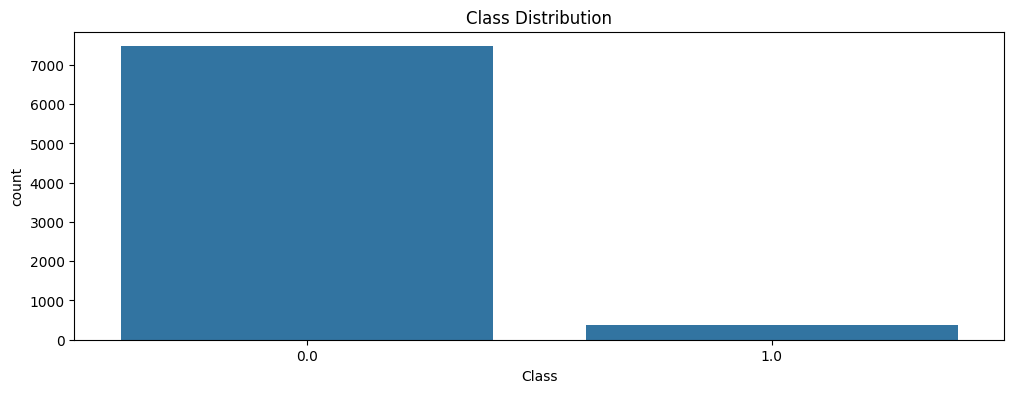

In [7]:
# Visualize class distribution
plt.figure(figsize=(12, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


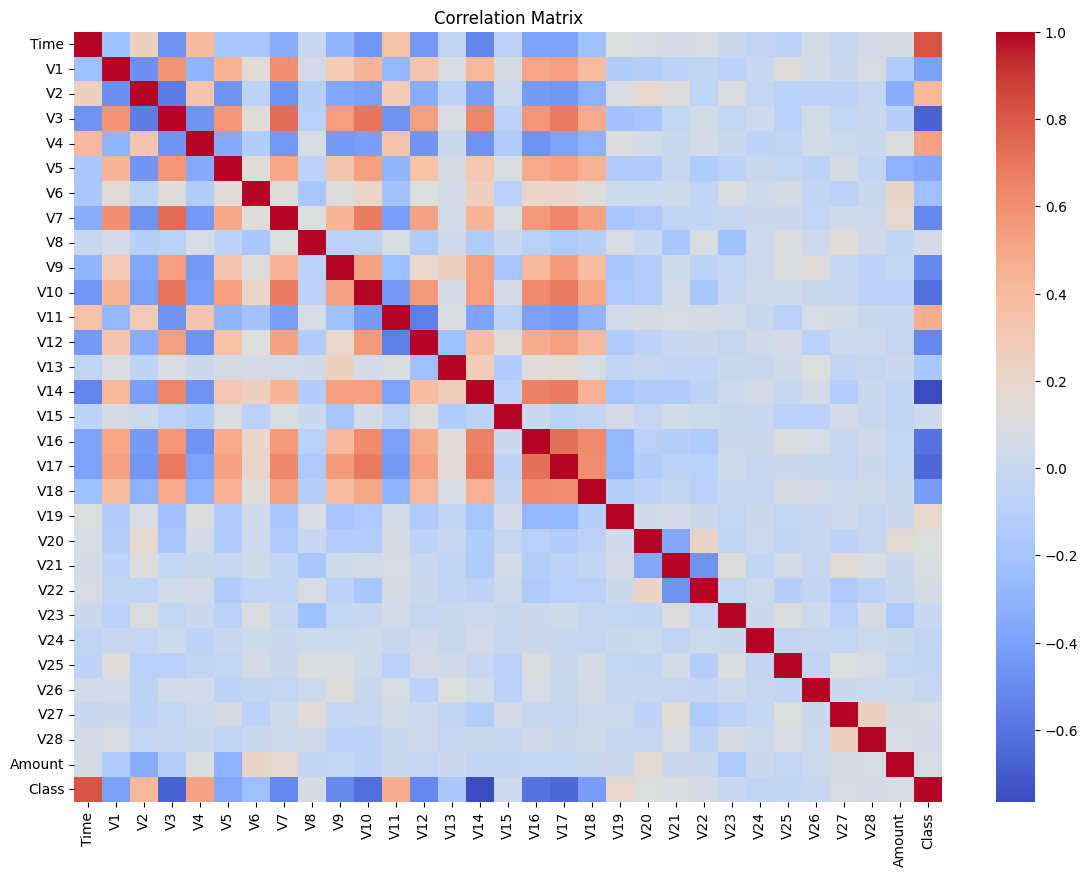

In [8]:
# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

# Separate features and target variable

In [9]:
# Separate features and target variable
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']



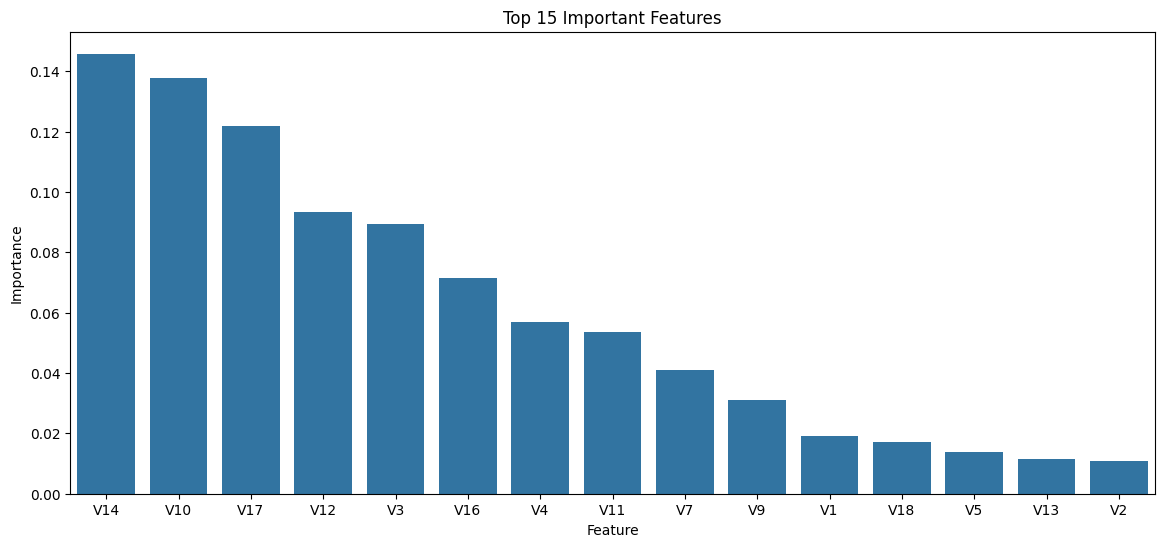

In [10]:
# Select important features using Random Forest
rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_feature_selector.fit(X, y)

# Calculate feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_feature_selector.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance with bars in vertical direction
plt.figure(figsize=(14, 6))
sns.barplot(x='feature', y='importance', data=feature_importance.head(15))
plt.xticks(rotation=0) 
plt.title('Top 15 Important Features')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Select top 15 features
top_features = feature_importance['feature'].head(15).tolist()
X = X[top_features]

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Apply SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Class distribution after SMOTE:
Class
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


Classification Report:


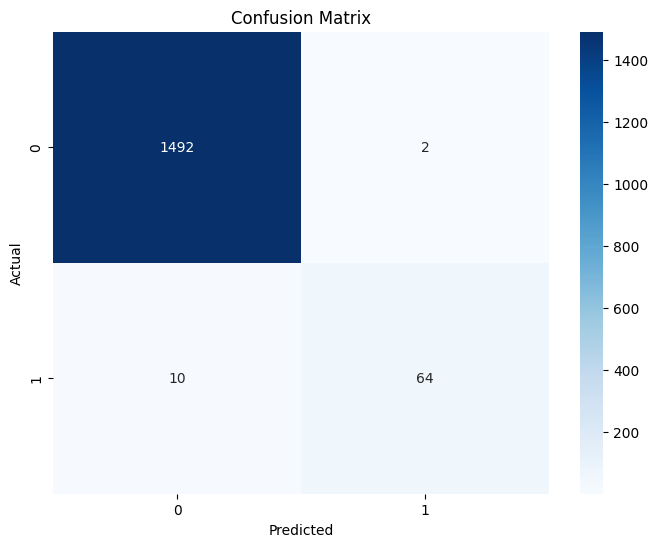

In [13]:
# Train Random Forest Classifier
from sklearn.metrics import classification_report, confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
classification_report(y_test, y_pred)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

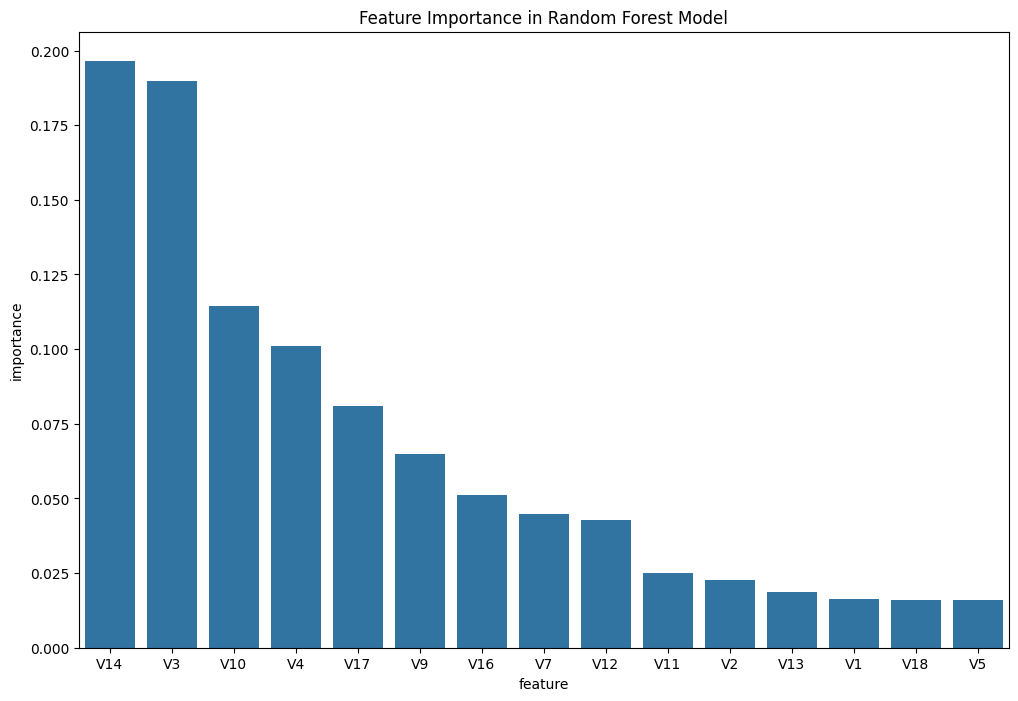

In [14]:
feature_importance = pd.DataFrame({'feature': top_features, 'importance': rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance as vertical bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=0)
plt.show()

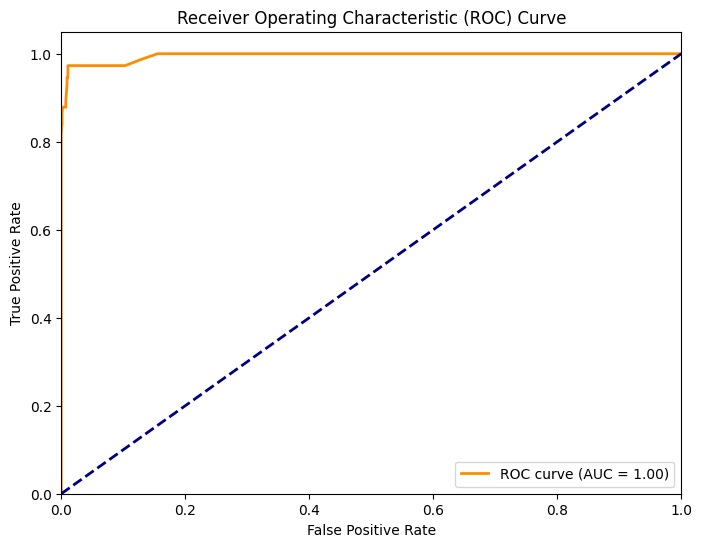

Optimal threshold: 0.2700
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1494
         1.0       0.82      0.97      0.89        74

    accuracy                           0.99      1568
   macro avg       0.91      0.98      0.94      1568
weighted avg       0.99      0.99      0.99      1568



In [15]:
from sklearn.metrics import roc_curve, auc

# Get probability predictions
y_prob = rf_classifier.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Find optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal threshold: {optimal_threshold:.4f}")

# Apply optimal threshold
y_pred_optimal = (y_prob >= optimal_threshold).astype(int)

print("Classification Report with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))